In [161]:
import seaborn as sns

In [162]:
# 데이터 로드
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [163]:
# bill_length_mm	bill_depth_mm	flipper_length_mm	body_mass_g 를 가지고
# svc를 사용하여 어떤 종인지(species) 를 분류하자! 예측하자! - 17참조

In [164]:
# 데이터 확인
pg = penguins[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
pg

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [165]:
# 데이터의 null 값과 결측값 확인
print(pg.isnull().sum())
print(pg.isna().sum())

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64
species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64


In [166]:
# 데이터의 null 값과 결측값 삭제
pg.dropna(inplace=True)
print(pg.isnull().sum())
print(pg.isna().sum())

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


C:\Users\Daniel\AppData\Local\Temp\ipykernel_32588\1856877386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pg.dropna(inplace=True)


In [167]:
from sklearn.svm import SVC, LinearSVC
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [168]:
pg

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Gentoo,47.2,13.7,214.0,4925.0
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [169]:
# species의 종류에 대해 확인한다.
pg['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [170]:
# spcies가 문자라서 머신러닝에서는 처리가 불가하여 숫자로 변경한다.
# .loc를 사용하여 모든 행(:)의 'species' 컬럼에 값을 할당
# 0 : Adelie / 1 : Chinstrap / 2 : Gentoo
# 데이터 레이블 표시를 위한 species_names 준비
pg.loc[:,"species"] = pg["species"].map(lambda x : 0 if x =="Adelie" else ( 1 if  x =="Chinstrap" else 2))
species_names = ['Adelie', 'Chinstrap', 'Gentoo']

In [171]:
# 변경된 결과 확인
pg

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0
340,2,46.8,14.3,215.0,4850.0
341,2,50.4,15.7,222.0,5750.0
342,2,45.2,14.8,212.0,5200.0


In [172]:

# 데이터 셋
# 시각화를 위해선 4개의 특성을 한번에 넣고 모두 그릴 수 없다. 그래서 2개의 특성만 선택해야 한다. 
x = pg[["bill_length_mm", "bill_depth_mm"]].values
y = pg["species"]

In [173]:
y.dtype

dtype('O')

In [174]:
y = pg["species"].astype(int)

In [175]:
y.dtype

dtype('int64')

In [176]:
# 모델 선택
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)


In [177]:
# Task 1. 배운 내용대로 출력하기
# 시각화 함수 정의
def plot_decision_regions(x, y, classifier):
    cmap =  ListedColormap(("red","green", "blue"))

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 =  np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    
    # 그리드의 모든 점에 대해 예측 수행
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    # 결정 경계 그리기
    plt.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터 샘플 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)


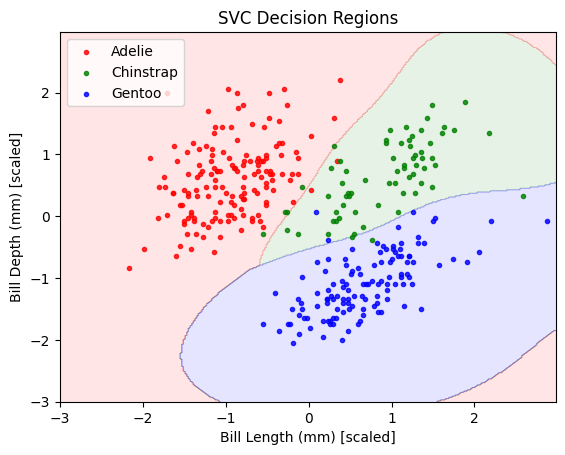

In [178]:
svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
svc.fit(x_scale, y)

plot_decision_regions(x_scale, y, svc)
plt.title('SVC Decision Regions')
plt.xlabel('Bill Length (mm) [scaled]')
plt.ylabel('Bill Depth (mm) [scaled]')
plt.legend(loc='upper left')
legend = plt.legend(loc='upper left')
for i, name in enumerate(species_names):
    legend.get_texts()[i].set_text(name)

plt.show()


In [179]:
# 4개의 특성으로 출력을 위한 셋팅
x1 = pg[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

In [180]:
# AI의 도움을 받기 시작한다.
# Task 2. 모든 특성을 출력해보기

# 4개의 조합을 하기 위해선 2번의 for 문을 작업하여 진행해야 하지만 
# combinations를 사용하면 순서대로 4개의 특성으로 6개의 조합을 만들어주는 기능이 있다.
from itertools import combinations

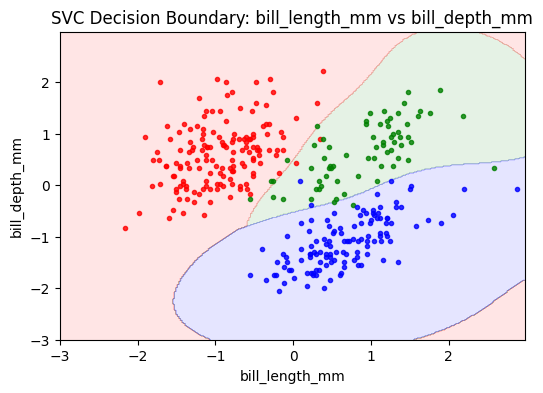

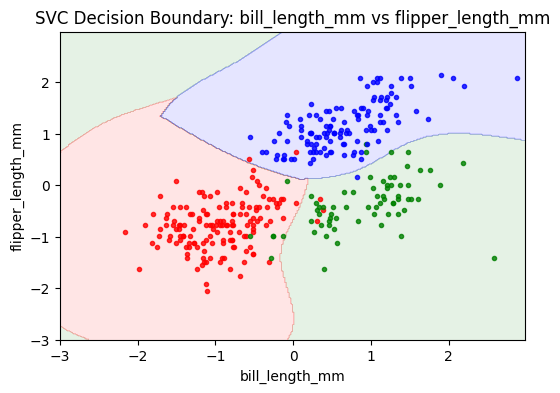

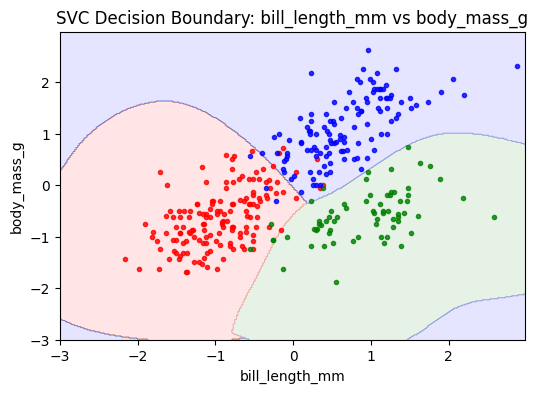

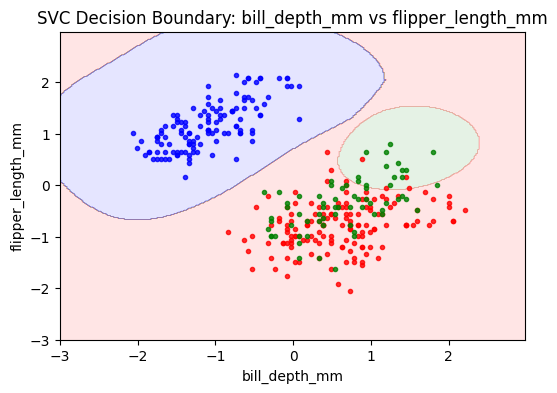

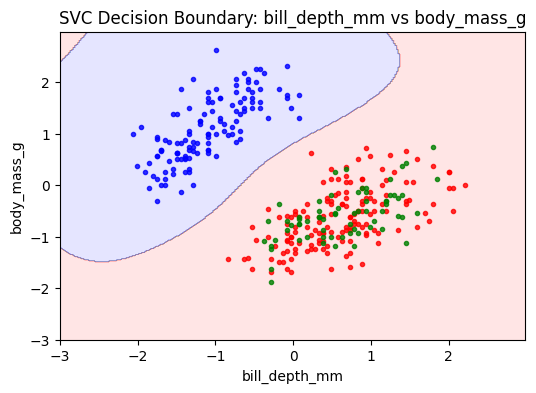

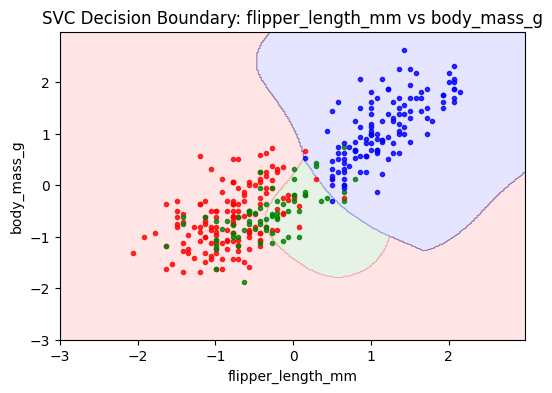

In [181]:
# for문을 통해서 위의 함수를 이용해서 6개의 조합의 도표를 출력해준다.
for f1, f2 in combinations(x1, 2):
    x2 = pg[[f1, f2]].values
    # 스케일 조정
    sc = StandardScaler()
    x_scaled = sc.fit_transform(x2)

    svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
    svc.fit(x_scaled, y)

    plt.figure(figsize=(6, 4))
    plot_decision_regions(x_scaled, y, svc)
    plt.title(f"SVC Decision Boundary: {f1} vs {f2}")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

In [182]:
# Task 3. 6개의 도표가 너무 길게 나열되어 보기 힘들다. 한 눈에 보기 쉽게 배열하고 싶다.

# 시각화 함수 정의
def plot_decision_regions2(x, y, classifier, ax, f1, f2):
    cmap =  ListedColormap(("red","green", "blue"))

    xx1, xx2 =  np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    
    # 그리드의 모든 점에 대해 예측 수행
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    # 결정 경계 그리기
    plt.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터 샘플 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)

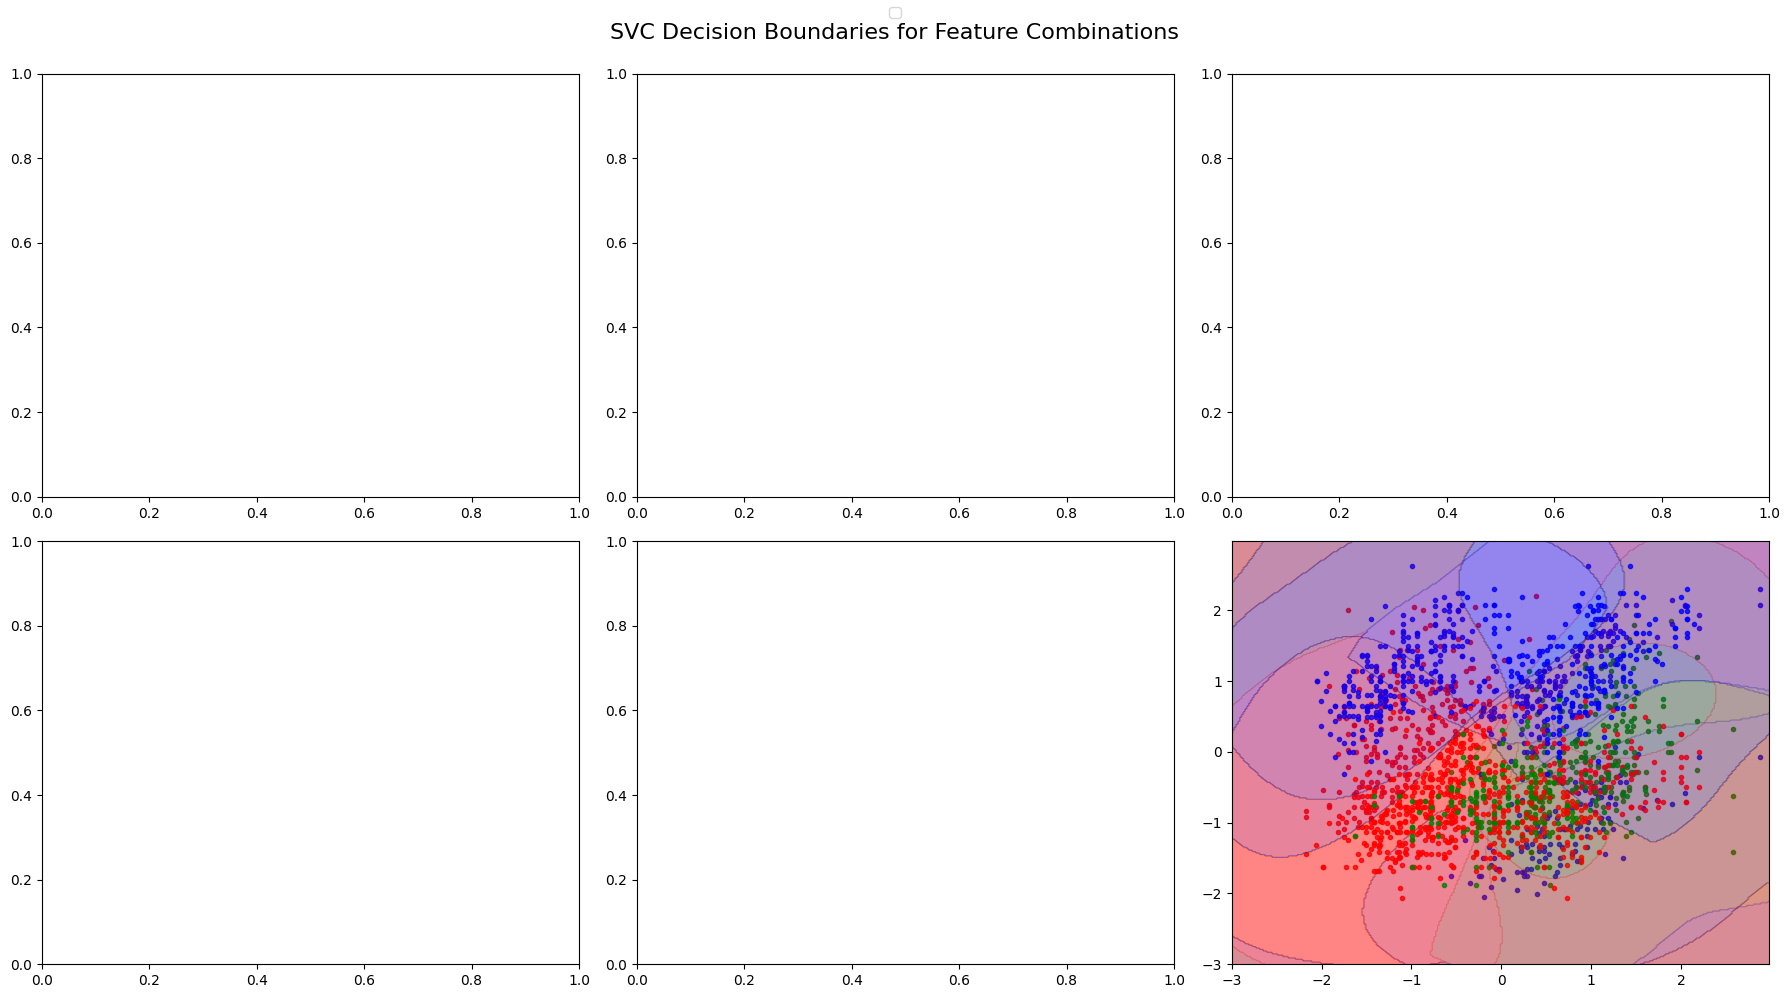

In [183]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (f1, f2) in enumerate(combinations(x1, 2)):
    x2 = pg[[f1, f2]].values

    sc = StandardScaler()
    x_scaled = sc.fit_transform(x2)
    
    svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
    svc.fit(x_scaled, y)

    plot_decision_regions2(x_scaled, y, svc, axes[idx], f1, f2)
    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("SVC Decision Boundaries for Feature Combinations", fontsize=16)
plt.show()
# 실수로 인한 우연하게 도표의 겹침현상이 발생하였다.

In [184]:
# Task 4. 각각의 도표에 제대로 표시 되도록 변경이 필요하다.
# 시각화 함수 정의
def plot_decision_regions3(x, y, classifier, ax, f1, f2):
    cmap =  ListedColormap(("red","green", "blue"))

    xx1, xx2 =  np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    
    # 그리드의 모든 점에 대해 예측 수행
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    # 결정 경계 그리기
    # alpha=0.1은 색을 10%만 칠해 반투명하게 만듭니다.
    ax.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    # 데이터 점 그리기
    for idx, cl in enumerate(np.unique(y)):
        # ax.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)
        # 점이 더욱 명확하게 보이도록 수정해보자.
        # edgecolor='k'는 점에 검은색 테두리
        ax.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], label=cl, edgecolor="k", s=30)
        
    
    ax.set_title(f"{f1} vs {f2}")
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)

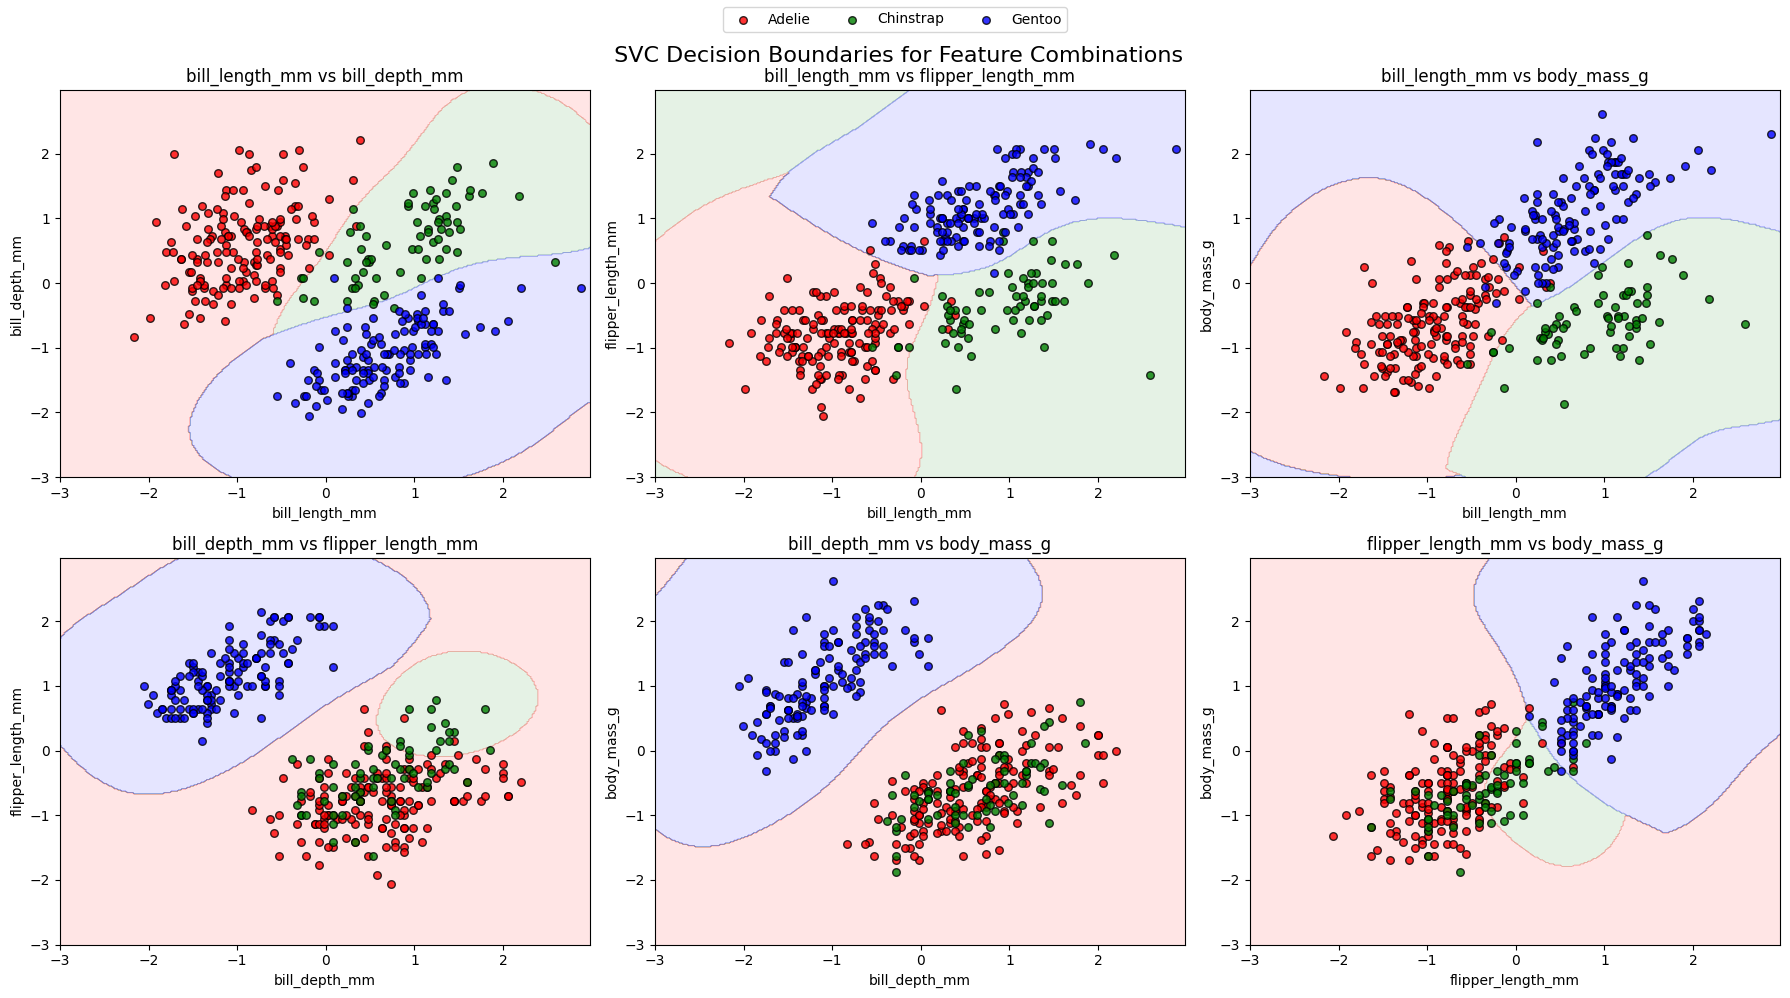

In [185]:
# 큰 도화지 준비
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (f1, f2) in enumerate(combinations(x1, 2)):
    x2 = pg[[f1, f2]].values

    sc = StandardScaler()
    x_scaled = sc.fit_transform(x2)
    
    svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
    svc.fit(x_scaled, y)

    plot_decision_regions3(x_scaled, y, svc, axes[idx], f1, f2)
    

fig.legend(species_names, loc='upper center', ncol=3)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle(f"\n SVC Decision Boundaries for Feature Combinations", fontsize=16)
plt.show()

그리는 중: bill_length_mm vs bill_depth_mm
그리는 중: bill_length_mm vs flipper_length_mm
그리는 중: bill_length_mm vs body_mass_g
그리는 중: bill_depth_mm vs flipper_length_mm
그리는 중: bill_depth_mm vs body_mass_g
그리는 중: flipper_length_mm vs body_mass_g


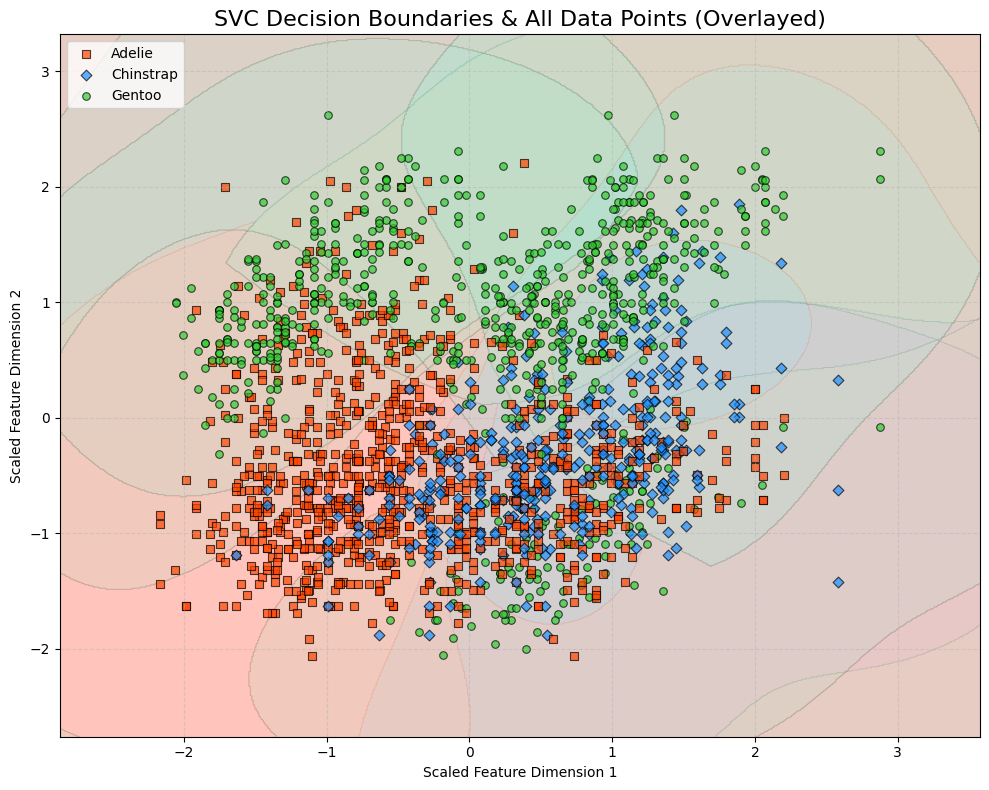

In [186]:
# # Task 5. Task 3의 도표 겹침을 커다란 한페이지에 나타내고 싶다. 

# 1. 시각화 함수 정의 (전체 축 범위를 고려하도록 수정)
# 이 함수는 호출될 때마다 현재 활성화된 도화지(plt)에 겹쳐 그립니다.
def plot_decision_regions_overlay_all(X_data, y_data, classifier,
                                      global_x_min, global_x_max,
                                      global_y_min, global_y_max,
                                      resolution=0.01, alpha=0.08): # resolution 더 작게
    colors = ('#FF6347', '#4682B4', '#3CB371') # 대비되는 색상: 토마토, 스틸블루, 미디움시그린
    cmap = ListedColormap(colors[:len(np.unique(y_data))])

    # 그리드 생성 시 전역(global) X, Y 축 범위를 사용
    xx1, xx2 = np.meshgrid(np.arange(global_x_min, global_x_max, resolution),
                           np.arange(global_y_min, global_y_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=alpha, cmap=cmap)


# 2. X 데이터 정의 (4개 특성)
feature_names = x1.columns
feature_combinations = list(combinations(feature_names, 2))

# 3. 큰 도화지(Figure) 하나 생성
plt.figure(figsize=(10, 8))

# 4. 모든 스케일링된 데이터 포인트를 저장할 리스트
all_scaled_X_points = []
# 모든 스케일러와 SVC 모델을 저장할 리스트
all_scalers = []
all_svcs = []

for i, (f1, f2) in enumerate(feature_combinations):
    X_pair = x1[[f1, f2]].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_pair) # 각 조합마다 새로 스케일링

    svc = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
    svc.fit(X_scaled, y)

    all_scaled_X_points.append(X_scaled)
    all_scalers.append(scaler)
    all_svcs.append(svc)


# 5. 모든 스케일링된 데이터 포인트들을 하나의 배열로 합치기
# 이렇게 해야 모든 점들의 최소/최대 범위를 정확히 알 수 있습니다.
combined_X_scaled = np.vstack(all_scaled_X_points)

# 6. X, Y 축 범위 통일 (전체 데이터를 아우르는 범위)
x_min_all, x_max_all = combined_X_scaled[:, 0].min() - 0.7, combined_X_scaled[:, 0].max() + 0.7
y_min_all, y_max_all = combined_X_scaled[:, 1].min() - 0.7, combined_X_scaled[:, 1].max() + 0.7

plt.xlim(x_min_all, x_max_all)
plt.ylim(y_min_all, y_max_all)

# 7. 모든 조합의 결정 경계 그리기
for i, (f1, f2) in enumerate(feature_combinations):
    X_pair = x1[[f1, f2]].values
    # 해당 조합의 스케일러로 데이터를 다시 스케일링 (이미 학습된 scaler 사용)
    X_scaled_for_plot = all_scalers[i].transform(X_pair)
    svc_for_plot = all_svcs[i]

    print(f"그리는 중: {f1} vs {f2}")
    plot_decision_regions_overlay_all(X_scaled_for_plot, y, svc_for_plot,
                                      global_x_min=x_min_all, global_x_max=x_max_all,
                                      global_y_min=y_min_all, global_y_max=y_max_all,
                                      alpha=0.07) # alpha 값 더 낮춤

# 8. 모든 데이터 샘플(점)을 한 번에 그리기 (시인성 개선)
# 각 조합의 스케일링된 X_pair와 y를 사용하여 모든 점을 그림
# 시인성을 위해 마커와 색상 변경
markers = ('s', 'D', 'o') # Adelie: 사각형, Chinstrap: 다이아몬드, Gentoo: 원
colors = ('#FF4500', '#1E90FF', '#32CD32') # Adelie: 오렌지레드, Chinstrap: 닷지블루, Gentoo: 라임그린

# 범례 핸들 및 라벨 초기화
legend_handles = []
legend_labels = []

for X_sc in all_scaled_X_points:
    for idx, cl in enumerate(np.unique(y)):
        current_points = X_sc[y == cl]
        if len(current_points) > 0:
            scatter = plt.scatter(x=current_points[:, 0], y=current_points[:, 1],
                                  alpha=0.7, s=30, # 점 크기 약간 키움
                                  c=colors[idx],
                                  marker=markers[idx],
                                  edgecolor='black', # 검은색 테두리 추가
                                  linewidth=0.8) # 테두리 두께

            # 범례 중복을 피하기 위해 각 클래스의 첫 번째 scatter 객체만 저장
            if species_names[cl] not in legend_labels:
                legend_handles.append(scatter)
                legend_labels.append(species_names[cl])

# 9. 전체 제목 및 범례 설정
plt.title('SVC Decision Boundaries & All Data Points (Overlayed)', fontsize=16)
plt.xlabel('Scaled Feature Dimension 1')
plt.ylabel('Scaled Feature Dimension 2')
plt.legend(legend_handles, legend_labels, loc='upper left', fontsize=10) # 저장된 핸들로 범례 생성
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()